In [93]:
import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm
import numpy
import pandas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier


import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error



from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from keras.constraints import maxnorm

In [94]:
df = pd.read_csv(r'C:\Users\reemn\Downloads\adult.csv\adult.csv')

In [95]:
df.rename(columns={"capital.gain": "capital gain", 'capital.loss': 'capital loss', 'native.country': 'country','hours.per.week': 'hours per week','marital.status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [96]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
country            583
income               0
dtype: int64

In [97]:
# code will replace the special character to nan and then drop the columns 

df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['country'] = df['country'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [98]:
#dropping based on uniquness of data from the dataset 
df.drop(['education.num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [99]:
df = df.dropna()
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [100]:
#gender
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [101]:
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [102]:
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [103]:
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [104]:
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

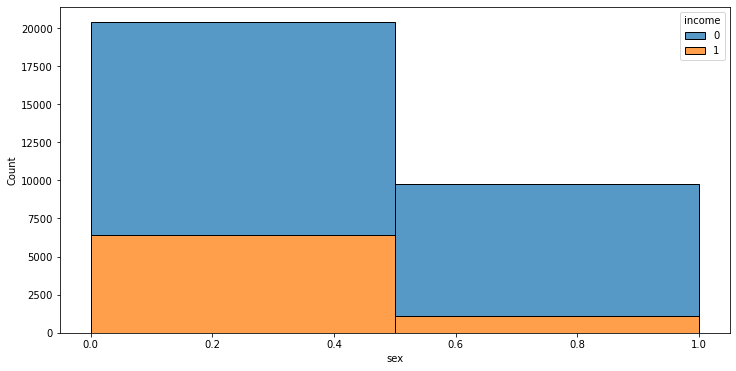

In [109]:
plt.figure(figsize=(12,6));
sns.histplot(binwidth=0.5, x="sex", hue="income", data=df, stat="count", multiple="stack");

In [110]:
df_men, df_women = [x for _, x in df.groupby(df['sex'] == 1 )]

In [111]:
df_men.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20380 entries, 6 to 32560
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   workclass     20380 non-null  int32
 1   education     20380 non-null  int32
 2   marital       20380 non-null  int32
 3   occupation    20380 non-null  int32
 4   relationship  20380 non-null  int32
 5   race          20380 non-null  int32
 6   sex           20380 non-null  int32
 7   income        20380 non-null  int32
dtypes: int32(8)
memory usage: 796.1 KB


In [112]:
df_men.head()

,workclass,education,marital,occupation,relationship,race,sex,income
6,5,13,3,3,3,3,0,0
11,6,7,5,5,0,3,0,1
13,5,4,3,7,0,3,0,1
15,5,7,4,5,0,3,0,1
16,5,11,4,11,0,3,0,1


In [113]:
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9782 entries, 1 to 32559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   workclass     9782 non-null   int32
 1   education     9782 non-null   int32
 2   marital       9782 non-null   int32
 3   occupation    9782 non-null   int32
 4   relationship  9782 non-null   int32
 5   race          9782 non-null   int32
 6   sex           9782 non-null   int32
 7   income        9782 non-null   int32
dtypes: int32(8)
memory usage: 382.1 KB


In [114]:
df_x_men = pd.DataFrame(np.c_[df_men['relationship'], df_men['education'], df_men['race'],df_men['occupation'],df_men['sex'],df_men['marital'],df_men['workclass']], columns = ['relationship','education','race','occupation','sex','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y_men = pd.DataFrame(df_men.income)

In [115]:
df_x_women = pd.DataFrame(np.c_[df_women['relationship'], df_women['education'], df_women['race'],df_women['occupation'],df_women['sex'],df_women['marital'],df_women['workclass']], columns = ['relationship','education','race','occupation','sex','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y_women = pd.DataFrame(df_women.income)

In [116]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train_men, x_test_men, y_train_men, y_test_men = train_test_split(df_x_men, df_y_men, test_size=0.33, random_state=42)

In [117]:
#Initialize the linear regression model
#reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train_women, x_test_women, y_train_women, y_test_women = train_test_split(df_x_women, df_y_women, test_size=0.33, random_state=42)

In [118]:
#num_instances = len(X)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('L_SVM', LinearSVC()))
models.append(('SGDC', SGDClassifier()))

# Evaluations
results = []
names = []

for name, model in models:
    # Fit the model
    model.fit(x_train_men, y_train_men)
    
    predictions = model.predict(x_test_men)
    
    # Evaluate the model
    score = accuracy_score(y_test_men, predictions)
    mse = mean_squared_error(predictions, y_test_men)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mse)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mse)
    print(msg)

C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


LR: 0.695213 (0.304787)
LDA: 0.696105 (0.303895)
KNN: 0.768510 (0.231490)
CART: 0.772525 (0.227475)
NB: 0.641094 (0.358906)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM: 0.730746 (0.269254)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


L_SVM: 0.698632 (0.301368)
SGDC: 0.699376 (0.300624)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [119]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('L_SVM', LinearSVC()))
models.append(('SGDC', SGDClassifier()))

# Evaluations
results = []
names = []

for name, model in models:
    # Fit the model
    model.fit(x_train_women, y_train_women)
    
    predictions = model.predict(x_test_women)
    
    # Evaluate the model
    score = accuracy_score(y_test_women, predictions)
    mse = mean_squared_error(predictions, y_test_women)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mse)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mse)
    print(msg)

C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


LR: 0.880458 (0.119542)
LDA: 0.878910 (0.121090)
KNN: 0.899350 (0.100650)
CART: 0.896872 (0.103128)
NB: 0.871477 (0.128523)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM: 0.888820 (0.111180)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


L_SVM: 0.888820 (0.111180)
SGDC: 0.739858 (0.260142)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [120]:
#Train our model with the training data
reg.fit(x_train_men, y_train_men)
#print our price predictions on our test data
y_pred_men = reg.predict(x_test_men)

C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [121]:
#Train our model with the training data
reg.fit(x_train_women, y_train_women)
#print our price predictions on our test data
y_pred_women = reg.predict(x_test_women)

C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [122]:
#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

array([0])

In [123]:
#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

array([0])

In [124]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test_men, y_pred_men))

Accuracy: 0.6952126077906631


In [125]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test_women, y_pred_women))

Accuracy: 0.8804583462372252


In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(y_test_men, y_pred_men))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80      4623
           1       0.53      0.26      0.35      2103

    accuracy                           0.70      6726
   macro avg       0.63      0.58      0.57      6726
weighted avg       0.66      0.70      0.66      6726



In [128]:
print(classification_report(y_test_women, y_pred_women))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2870
           1       0.06      0.01      0.01       359

    accuracy                           0.88      3229
   macro avg       0.48      0.50      0.47      3229
weighted avg       0.80      0.88      0.83      3229

